In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.datasets import fetch_california_housing

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor

In [40]:
data = fetch_california_housing(as_frame=True)

In [42]:
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [44]:
data_df = pd.DataFrame(data.data, columns = data.feature_names) 

In [46]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [48]:
data_df['price'] = data.target

In [50]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
data_df.shape

(20640, 9)

In [54]:
data_df.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       L

In [56]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [58]:
correlation = data_df.corr()

<Axes: >

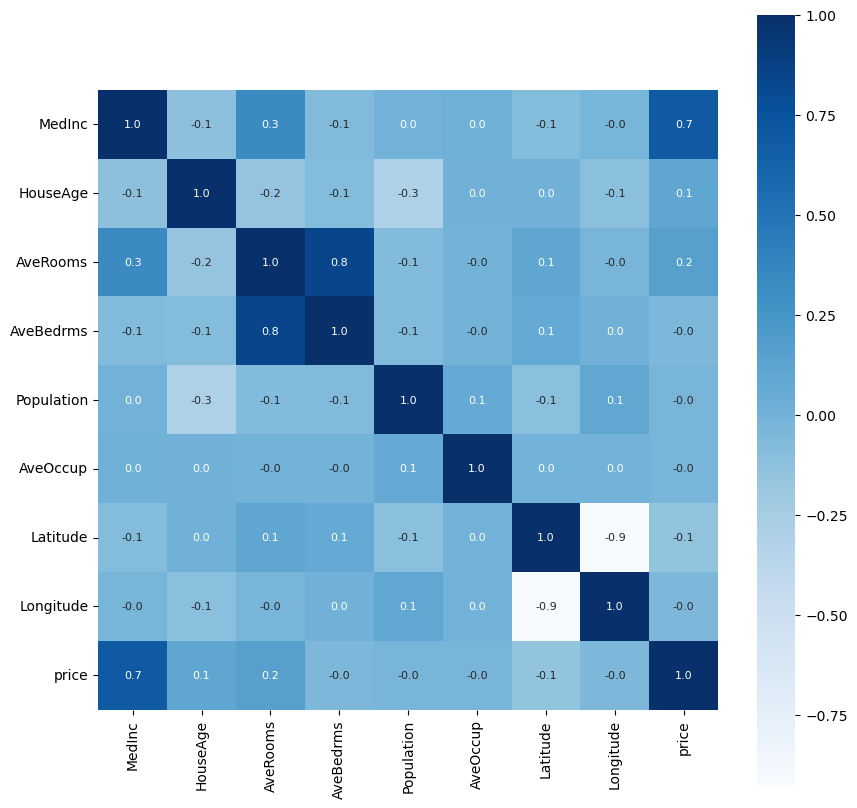

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [61]:
X = data_df.drop(['price'], axis=1)
y = data_df['price']

In [62]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [171]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [172]:
import xgboost as xgb
print(xgb.__version__)

2.1.3


In [245]:
from xgboost import XGBRegressor
 
# Example: Instantiate a regression model
xgb_model = XGBRegressor()
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [247]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [278]:
y_train_pred = xgb_model.predict(X_train)

In [280]:
train_r2_xgb = r2_score(y_train, y_train_pred)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred)
train_mse_xgb = mean_squared_error(y_train, y_train_pred)

In [282]:
print(" R-squared Error:", train_r2_xgb)
print(" Mean Absolute Error:", train_mae_xgb)
print(" Mean Squared Error:", train_mse_xgb)

 R-squared Error: 0.943650140819218
 Mean Absolute Error: 0.1933648700612105
 Mean Squared Error: 0.0748112971690747


In [290]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)  

# Access feature importances
xgb_importance = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xg_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("XGBoost Feature Importances:")
print(xgb_importance_df)

XGBoost Feature Importances:
      Feature  Importance
0      MedInc    0.495321
5    AveOccup    0.140430
7   Longitude    0.109037
6    Latitude    0.095238
1    HouseAge    0.066769
2    AveRooms    0.045192
4  Population    0.024329
3   AveBedrms    0.023684


In [314]:
y_pred = model.predict(X_test)

In [316]:
test_r2_xgb = r2_score(y_test, y_pred)
test_mae_xgb = mean_absolute_error(y_test, y_pred)
test_mse_xgb = mean_squared_error(y_test, y_pred)

In [318]:
print(" R-squared Error:", test_r2_xgb)
print(" Mean Absolute Error:", test_mae_xgb)
print(" Mean Squared Error:", test_mse_xgb)

 R-squared Error: 0.8338000331788725
 Mean Absolute Error: 0.3108631800268186
 Mean Squared Error: 0.22387540906811954


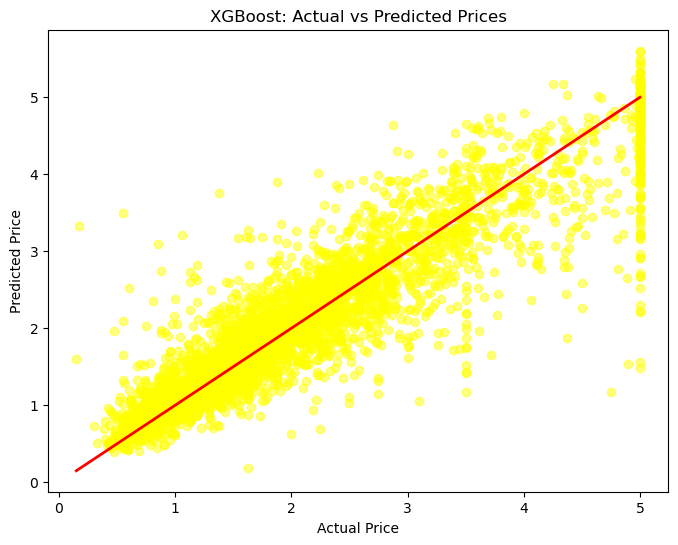

In [320]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='yellow', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Prices")
plt.show()

In [310]:
# Instantiate the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [322]:
lr_pred = model.predict(X_train)

In [324]:
train_r2_lr = r2_score(y_train, lr_pred)
train_mae_lr = mean_absolute_error(y_train, lr_pred)
train_mse_lr = mean_squared_error(y_train, lr_pred)

In [326]:
print(" R-squared Error:", train_r2_lr)
print(" Mean Absolute Error:", train_mae_lr)
print(" Mean Squared Error:", train_mse_lr)

 R-squared Error: 0.943650140819218
 Mean Absolute Error: 0.1933648700612105
 Mean Squared Error: 0.0748112971690747


In [330]:
# Predict on the test data
lr_pred = lr_model.predict(X_test)

In [332]:
test_r2_lr = r2_score(y_test, lr_pred)
test_mae_lr = mean_absolute_error(y_test, lr_pred)
test_mse_lr = mean_squared_error(y_test, lr_pred)

In [336]:
print(" R-squared Error:", test_r2_lr)
print(" Mean Absolute Error:", test_mae_lr)
print(" Mean Squared Error:", test_mse_lr)

 R-squared Error: 0.6013853272055153
 Mean Absolute Error: 0.535829254965776
 Mean Squared Error: 0.5369436868087004


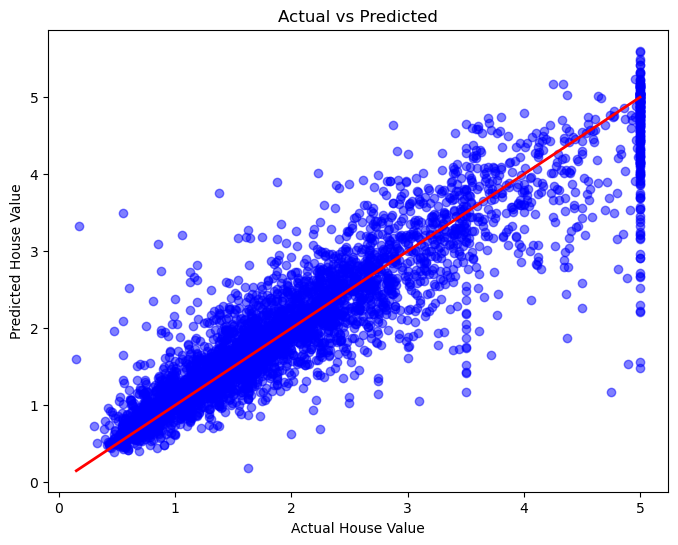

In [338]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.show()

In [111]:
# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [340]:
rf_pred = model.predict(X_train)

In [342]:
train_r2_rf = r2_score(y_train, rf_pred)
train_mae_rf = mean_absolute_error(y_train, rf_pred)
train_mse_rf = mean_squared_error(y_train, rf_pred)

In [344]:
print(" R-squared Error:", train_r2_rf)
print(" Mean Absolute Error:", train_mae_rf)
print(" Mean Squared Error:", train_mse_rf)

 R-squared Error: 0.943650140819218
 Mean Absolute Error: 0.1933648700612105
 Mean Squared Error: 0.0748112971690747


In [346]:
rf_pred = rf_model.predict(X_test)

In [348]:
test_r2_rf = r2_score(y_test, rf_pred)
test_mae_rf = mean_absolute_error(y_test, rf_pred)
test_mse_rf = mean_squared_error(y_test, rf_pred)

In [350]:
print(" R-squared Error:", test_r2_rf)
print(" Mean Absolute Error:", test_mae_rf)
print(" Mean Squared Error:", test_mse_rf)

 R-squared Error: 0.8037687844608988
 Mean Absolute Error: 0.3344707254602715
 Mean Squared Error: 0.264328233579202


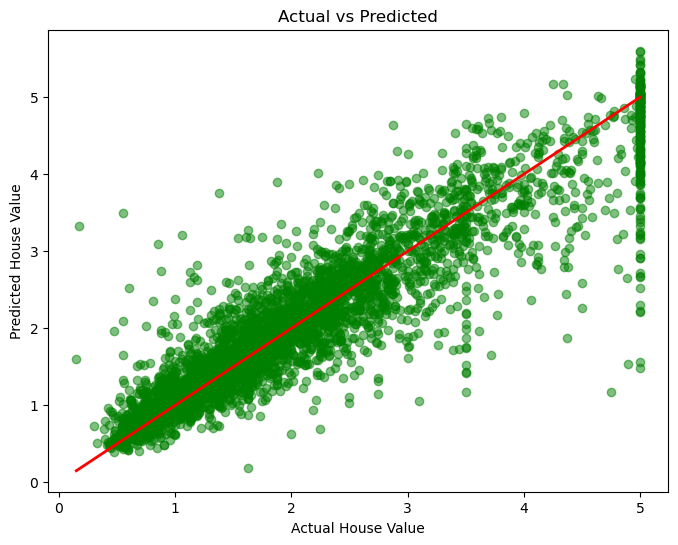

In [352]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.show()

In [121]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

      Feature  Importance
0      MedInc    0.524008
5    AveOccup    0.136848
6    Latitude    0.091756
7   Longitude    0.087446
1    HouseAge    0.053064
2    AveRooms    0.045564
4  Population    0.032282
3   AveBedrms    0.029032


In [356]:
lr_test_pred = lr_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)
y_pred = xgb_model.predict(X_test)

In [370]:
lr_train_pred = lr_model.predict(X_train)  
lr_pred = lr_model.predict(X_test)

rf_train_pred = rf_model.predict(X_train) 
rf_pred = rf_model.predict(X_test)

xgb_train_pred = xgb_model.predict(X_train)   
xgb_pred = xgb_model.predict(X_test)

In [384]:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "Train R2": [
        r2_score(y_train, lr_train_pred),  
        r2_score(y_train, rf_train_pred),  
        r2_score(y_train, xgb_train_pred), 
    ],
    "Train MAE": [
        mean_absolute_error(y_train, lr_train_pred),  
        mean_absolute_error(y_train, rf_train_pred), 
        mean_absolute_error(y_train, xgb_train_pred),  
    ],
    "Train MSE": [
        mean_squared_error(y_train, lr_train_pred),  
        mean_squared_error(y_train, rf_train_pred),  
        mean_squared_error(y_train, xgb_train_pred),  
    ],
    "Test R2": [
        r2_score(y_test, lr_pred),  
        r2_score(y_test, rf_pred), 
        r2_score(y_test, xgb_pred),  
    ],
    "Test MAE": [
        mean_absolute_error(y_test, lr_pred),  
        mean_absolute_error(y_test, rf_pred),  
        mean_absolute_error(y_test, xgb_pred), 
    ],
    "Test MSE": [
        mean_squared_error(y_test, lr_pred), 
        mean_squared_error(y_test, rf_pred),  
        mean_squared_error(y_test, xgb_pred),  
    ],
}

df_results = pd.DataFrame(results)

print(pd.DataFrame(results))

               Model  Train R2  Train MAE  Train MSE   Test R2  Test MAE  \
0  Linear Regression  0.606821   0.530386   0.521994  0.601385  0.535829   
1      Random Forest  0.973027   0.122533   0.035811  0.803769  0.334471   
2            XGBoost  0.943650   0.193365   0.074811  0.833800  0.310863   

   Test MSE  
0  0.536944  
1  0.264328  
2  0.223875  


In [30]:
x = data[y]  
data['predict'] = xgb_model.predict(x)

NameError: name 'y' is not defined

In [80]:
model = xgb_model
pred = model.predict(y)


NameError: name 'xgb_model' is not defined